In [11]:
import pandas as pd
import numpy as np
import gzip

with gzip.open('../data/GTEx.gct.gz', 'rt') as f:
    data = pd.read_csv(f, sep='\t', comment='#', skiprows=2)

print(data.head())

                Name  Description  Adipose - Subcutaneous  \
0  ENSG00000223972.5      DDX11L1                 0.00000   
1  ENSG00000227232.5       WASH7P                 4.06403   
2  ENSG00000278267.1    MIR6859-1                 0.00000   
3  ENSG00000243485.5  MIR1302-2HG                 0.00000   
4  ENSG00000237613.2      FAM138A                 0.00000   

   Adipose - Visceral (Omentum)  Adrenal Gland  Artery - Aorta  \
0                       0.00000        0.00000         0.00000   
1                       3.37111        2.68549         4.04762   
2                       0.00000        0.00000         0.00000   
3                       0.00000        0.00000         0.00000   
4                       0.00000        0.00000         0.00000   

   Artery - Coronary  Artery - Tibial  Bladder  Brain - Amygdala  ...  \
0            0.00000          0.00000  0.00000           0.00000  ...   
1            3.90076          3.63963  5.16375           1.43859  ...   
2            0.00

In [12]:
import pandas as pd
import gzip

with gzip.open('../data/GTEx_gene_tpm.gct.gz', 'rt') as f:
    data2 = pd.read_csv(f, sep='\t', comment='#', skiprows=2)
    
print(data2.head())

                Name  Description  GTEX-1117F-0226-SM-5GZZ7  \
0  ENSG00000223972.5      DDX11L1                   0.00000   
1  ENSG00000227232.5       WASH7P                   8.76400   
2  ENSG00000278267.1    MIR6859-1                   0.00000   
3  ENSG00000243485.5  MIR1302-2HG                   0.07187   
4  ENSG00000237613.2      FAM138A                   0.00000   

   GTEX-1117F-0426-SM-5EGHI  GTEX-1117F-0526-SM-5EGHJ  \
0                     0.000                     0.000   
1                     3.861                     7.349   
2                     0.000                     1.004   
3                     0.000                     0.000   
4                     0.000                     0.000   

   GTEX-1117F-0626-SM-5N9CS  GTEX-1117F-0726-SM-5GIEN  \
0                   0.00000                     0.000   
1                  11.07000                     3.306   
2                   0.00000                     0.000   
3                   0.06761                     0.

In [21]:
data['Variance'] = data.iloc[:, 2:].var(axis=1)
result_df = data[['Name', 'Description', 'Variance']].copy()

result_df['Log_Variance'] = np.log1p(result_df['Variance'])
result_df['Variation'] = (result_df['Log_Variance'] - result_df['Log_Variance'].min()) / (result_df['Log_Variance'].max() - result_df['Log_Variance'].min())
print(result_df)

                  Name  Description      Variance  Log_Variance  Variation
0      ENSG00000223972      DDX11L1  5.034011e-04      0.000503   0.000013
1      ENSG00000227232       WASH7P  3.344721e+00      1.468962   0.038660
2      ENSG00000278267    MIR6859-1  0.000000e+00      0.000000   0.000000
3      ENSG00000243485  MIR1302-2HG  1.294118e-04      0.000129   0.000003
4      ENSG00000237613      FAM138A  0.000000e+00      0.000000   0.000000
...                ...          ...           ...           ...        ...
56195  ENSG00000198695       MT-ND6  1.642204e+12     28.127061   0.740241
56196  ENSG00000210194        MT-TE  8.691935e+02      6.768716   0.178137
56197  ENSG00000198727       MT-CYB  2.014425e+14     32.936525   0.866815
56198  ENSG00000210195        MT-TT  2.798269e+00      1.334545   0.035122
56199  ENSG00000210196        MT-TP  4.575908e+00      1.718455   0.045226

[56200 rows x 5 columns]


In [22]:
result_df.to_csv('../data/GTEx_tissue_variance.csv', index=False)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

chembl = pd.read_csv('../data/indication_gene_link/chembl_chembl_2.csv') 

In [16]:
data['Name'] = data['Name'].str[:-2]
chembl_merged = chembl.merge(data, left_on='EnsemblID', right_on='Name', how ='inner')
chembl_merged.head()

,Parent Molecule ChEMBL ID,Parent Molecule Name,EnsemblID,MESH Heading,EFO Terms,EFO IDs,Disease,Name,Description,Adipose - Subcutaneous,...,Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood,Variance
0,CHEMBL134,CLONIDINE,ENSG00000150594,Attention Deficit Disorder with Hyperactivity,attention deficit hyperactivity disorder,EFO:0003888,Attention Deficit Hyperactivity Disorder,ENSG00000150594,ADRA2A,91.913,...,18.315,6.7148,13.5768,2.23715,12.744,18.3699,13.5504,37.7389,0.140649,493.959718
1,CHEMBL134,CLONIDINE,ENSG00000150594,"Child Development Disorders, Pervasive",autism spectrum disorder,EFO:0003756,Autism Spectrum Disorder,ENSG00000150594,ADRA2A,91.913,...,18.315,6.7148,13.5768,2.23715,12.744,18.3699,13.5504,37.7389,0.140649,493.959718
2,CHEMBL134,CLONIDINE,ENSG00000150594,Opioid-Related Disorders,opioid dependence,EFO:0005611,Substance Use Disorders,ENSG00000150594,ADRA2A,91.913,...,18.315,6.7148,13.5768,2.23715,12.744,18.3699,13.5504,37.7389,0.140649,493.959718
3,CHEMBL134,CLONIDINE,ENSG00000150594,"Stress Disorders, Post-Traumatic",post-traumatic stress disorder,EFO:0001358,Post Traumatic Stress Disorder,ENSG00000150594,ADRA2A,91.913,...,18.315,6.7148,13.5768,2.23715,12.744,18.3699,13.5504,37.7389,0.140649,493.959718
4,CHEMBL134,CLONIDINE,ENSG00000150594,Anxiety,anxiety,EFO:0005230,Anxiety Disorder,ENSG00000150594,ADRA2A,91.913,...,18.315,6.7148,13.5768,2.23715,12.744,18.3699,13.5504,37.7389,0.140649,493.959718


In [8]:
chembl_merged = chembl_merged.drop_duplicates(subset=["Parent Molecule Name", "EFO IDs", "Disease", "Name"])
chembl_merged = chembl_merged.drop(chembl_merged.columns[[0, 1, 2, 3, 4, 5, 7, 8]], axis=1)
chembl_merged = chembl_merged.drop(chembl_merged.columns[[]
chembl_merged.head()

,Disease,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),...,Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood,Variance
0,Attention Deficit Hyperactivity Disorder,91.913,39.0518,1.93474,3.90301,7.68289,11.742,25.7105,1.45684,2.81066,...,18.315,6.7148,13.5768,2.23715,12.744,18.3699,13.5504,37.7389,0.140649,493.959718
1,Autism Spectrum Disorder,91.913,39.0518,1.93474,3.90301,7.68289,11.742,25.7105,1.45684,2.81066,...,18.315,6.7148,13.5768,2.23715,12.744,18.3699,13.5504,37.7389,0.140649,493.959718
2,Substance Use Disorders,91.913,39.0518,1.93474,3.90301,7.68289,11.742,25.7105,1.45684,2.81066,...,18.315,6.7148,13.5768,2.23715,12.744,18.3699,13.5504,37.7389,0.140649,493.959718
3,Post Traumatic Stress Disorder,91.913,39.0518,1.93474,3.90301,7.68289,11.742,25.7105,1.45684,2.81066,...,18.315,6.7148,13.5768,2.23715,12.744,18.3699,13.5504,37.7389,0.140649,493.959718
4,Anxiety Disorder,91.913,39.0518,1.93474,3.90301,7.68289,11.742,25.7105,1.45684,2.81066,...,18.315,6.7148,13.5768,2.23715,12.744,18.3699,13.5504,37.7389,0.140649,493.959718


In [ ]:
chembl_merged.columns()

In [9]:
tissue_means = chembl_merged.groupby('Disease').mean()
tissue_means.head(12)

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood,Variance
Disease,,,,,,,,,,,,,,,,,,,,,
Alzheimer’s Disease,14.040774,10.447671,4.625232,31.857463,16.019254,22.063562,7.727391,3.983243,5.952717,6.934328,...,8.886577,6.310505,8.283255,3.566212,4.496689,7.749319,10.412228,7.859498,4.522674,2469.975058
Anxiety Disorder,7.732800,5.391057,2.095353,10.074844,5.161926,8.605969,4.808772,2.888103,3.661878,5.731871,...,3.286367,5.351869,4.035530,4.573485,3.289930,5.024621,5.072517,4.507871,2.025228,166.190943
Attention Deficit Hyperactivity Disorder,13.372957,6.970291,1.215141,21.365105,7.017051,14.784242,4.531870,1.588837,2.311565,4.412127,...,4.638597,2.922823,6.819577,0.899932,2.852537,2.663993,9.198313,6.649521,0.285090,232.894314
Autism Spectrum Disorder,11.147079,6.557700,3.319697,14.493836,5.491418,13.243894,3.384138,1.306789,1.717594,4.116197,...,3.334008,2.334531,4.574753,1.102218,3.044377,3.507551,7.541216,5.128209,0.196314,201.072124
Bipolar Disorder,1.970357,2.225061,1.147113,2.807974,2.316551,2.705491,1.418987,3.678355,4.587309,5.747226,...,1.484706,2.468330,1.301648,5.782526,3.791620,3.504093,2.005549,1.694138,1.240709,138.881532
Eating Disorders,4.751985,7.579447,1.148833,0.849268,1.261623,0.592082,1.470714,9.559117,5.985203,11.240069,...,3.809654,1.959164,2.460574,32.955110,10.691183,11.109115,1.382111,1.830968,5.995440,460.299487
Major Depressive Disorder,9.387266,6.358712,2.123500,9.077455,6.026520,9.651474,6.358049,2.494743,3.237947,4.809489,...,3.674106,7.062602,2.499526,3.708227,2.300992,6.236036,4.608813,4.777609,0.493006,146.004120
OCD & Tourette Syndrome,4.485842,4.037142,1.116119,5.600715,2.482062,4.097083,1.717220,5.067998,5.004465,8.597975,...,2.213107,1.726885,2.224475,11.785613,4.920548,4.864361,3.354131,2.269266,2.125020,268.203126
Post Traumatic Stress Disorder,10.535575,7.994516,2.912293,16.324473,4.982676,12.027227,3.391152,4.636663,6.007647,7.161400,...,4.195001,2.354804,6.341743,7.798143,3.866947,4.948927,6.733750,4.846924,1.517311,296.637854


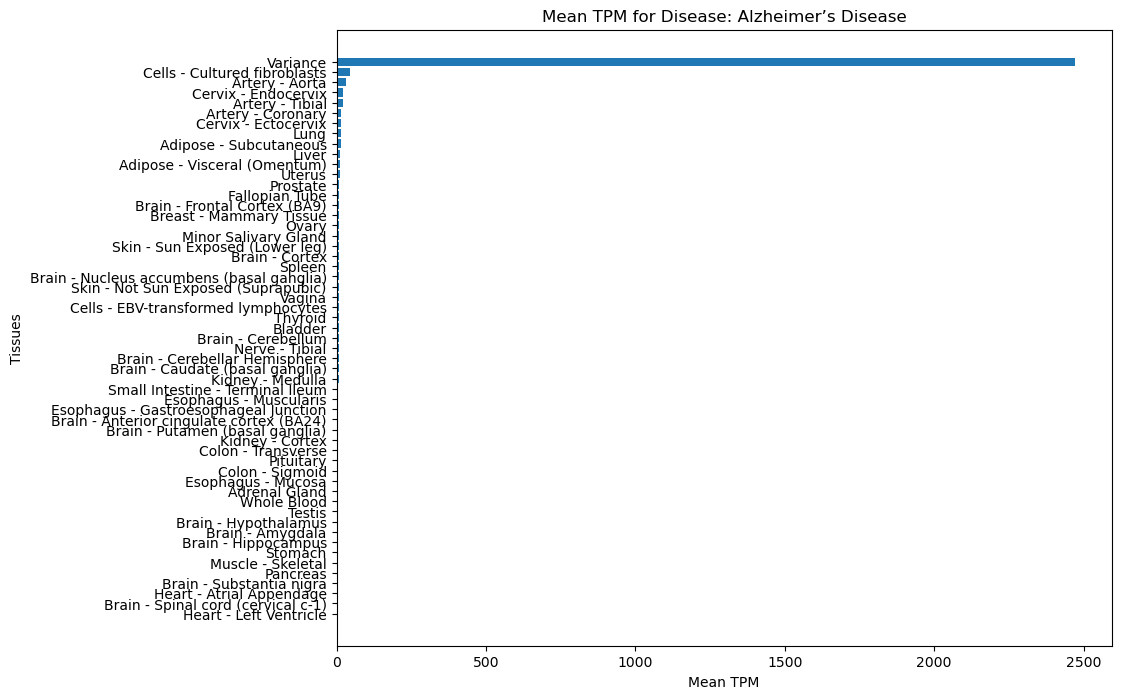

<Figure size 640x480 with 0 Axes>

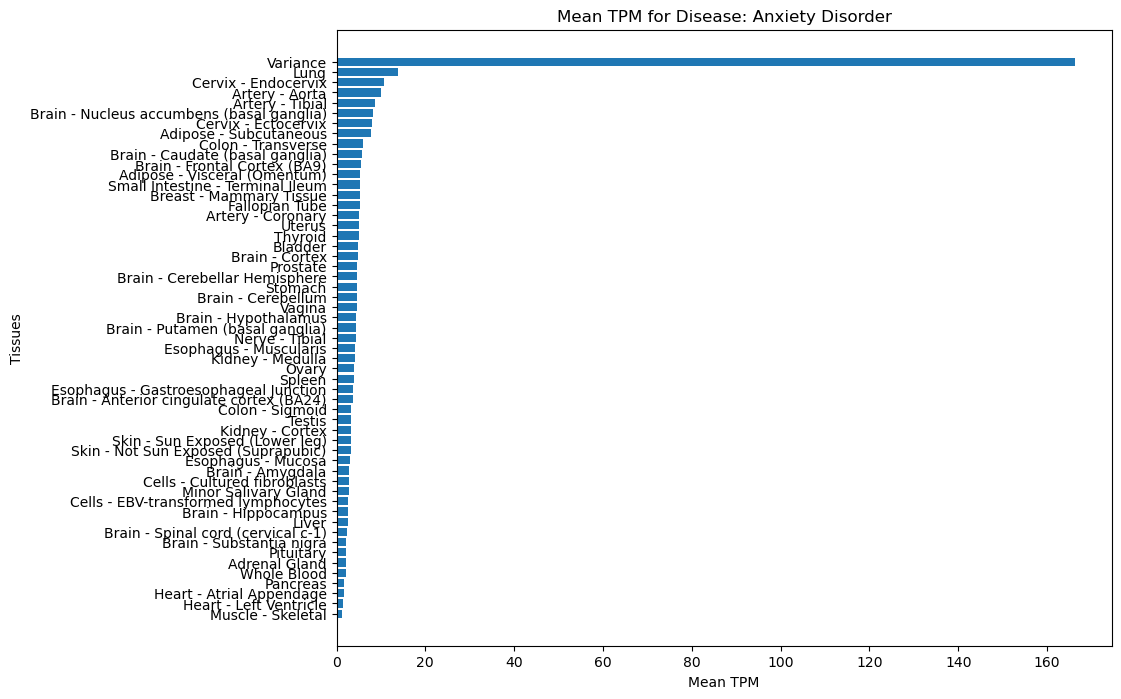

<Figure size 640x480 with 0 Axes>

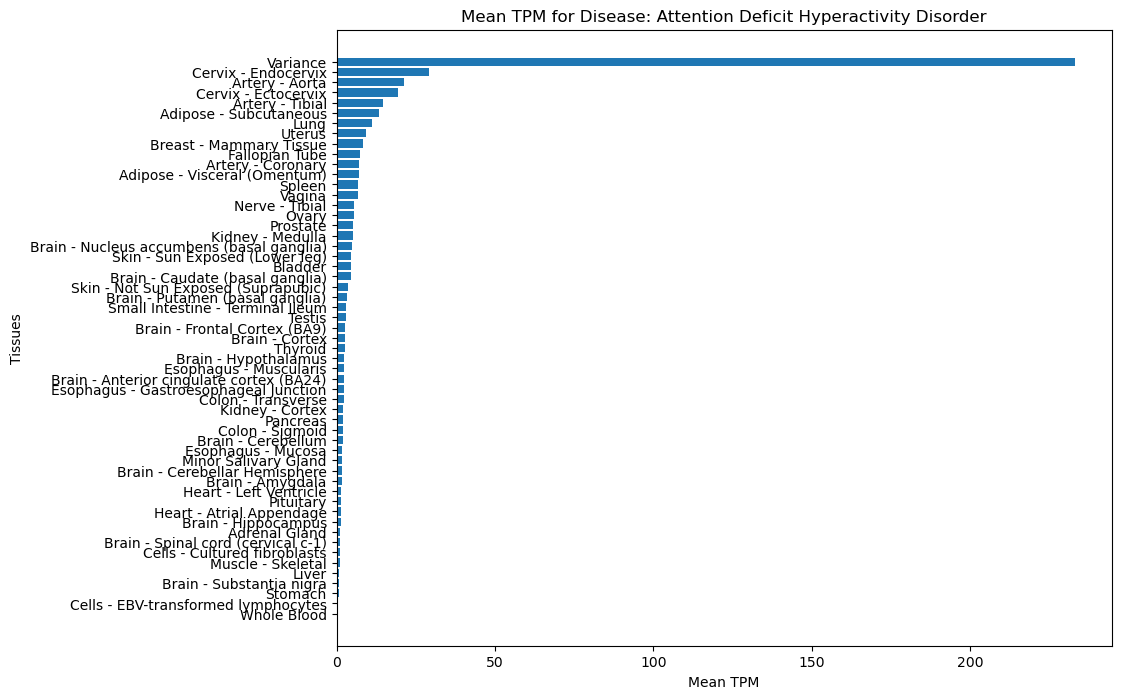

<Figure size 640x480 with 0 Axes>

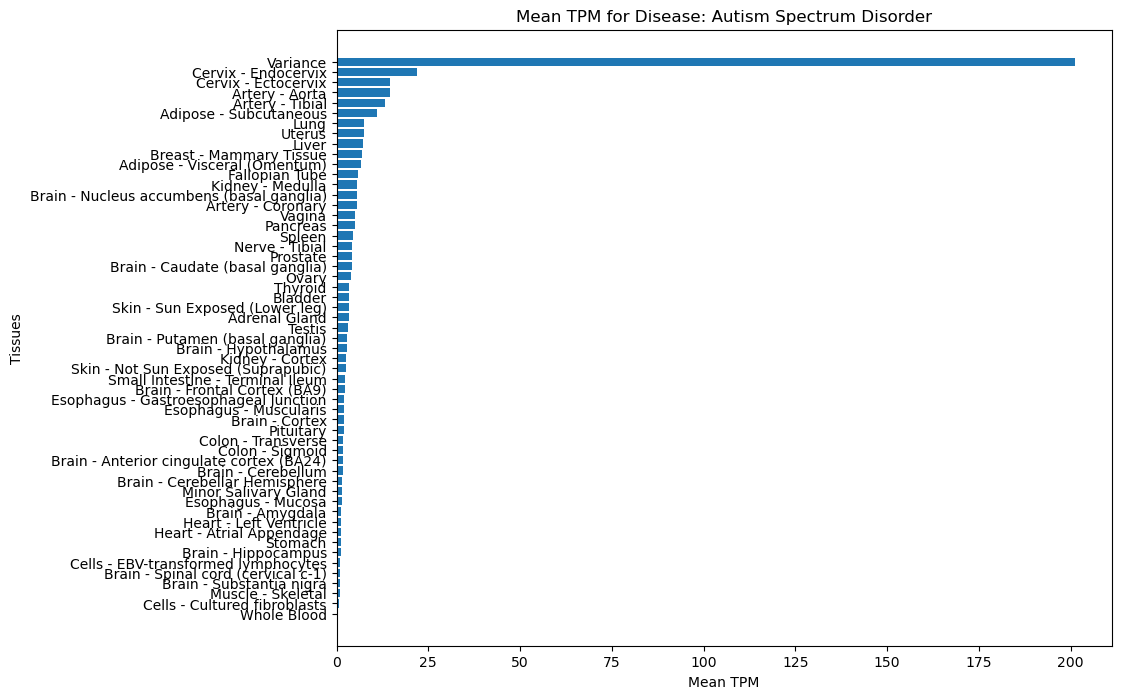

<Figure size 640x480 with 0 Axes>

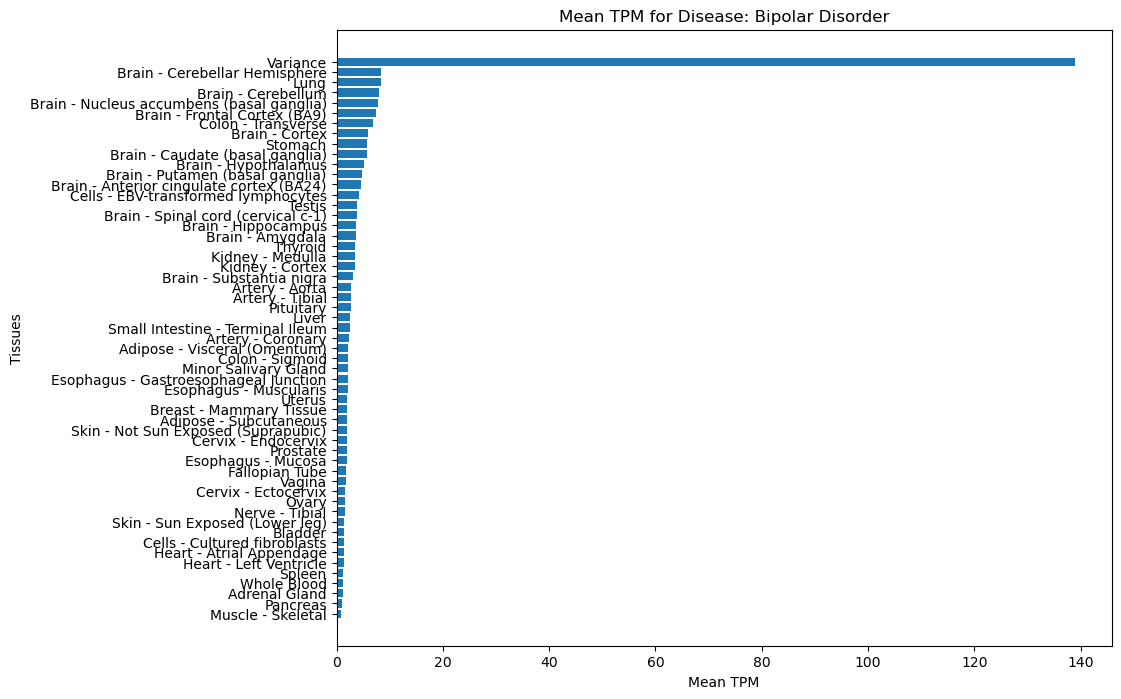

<Figure size 640x480 with 0 Axes>

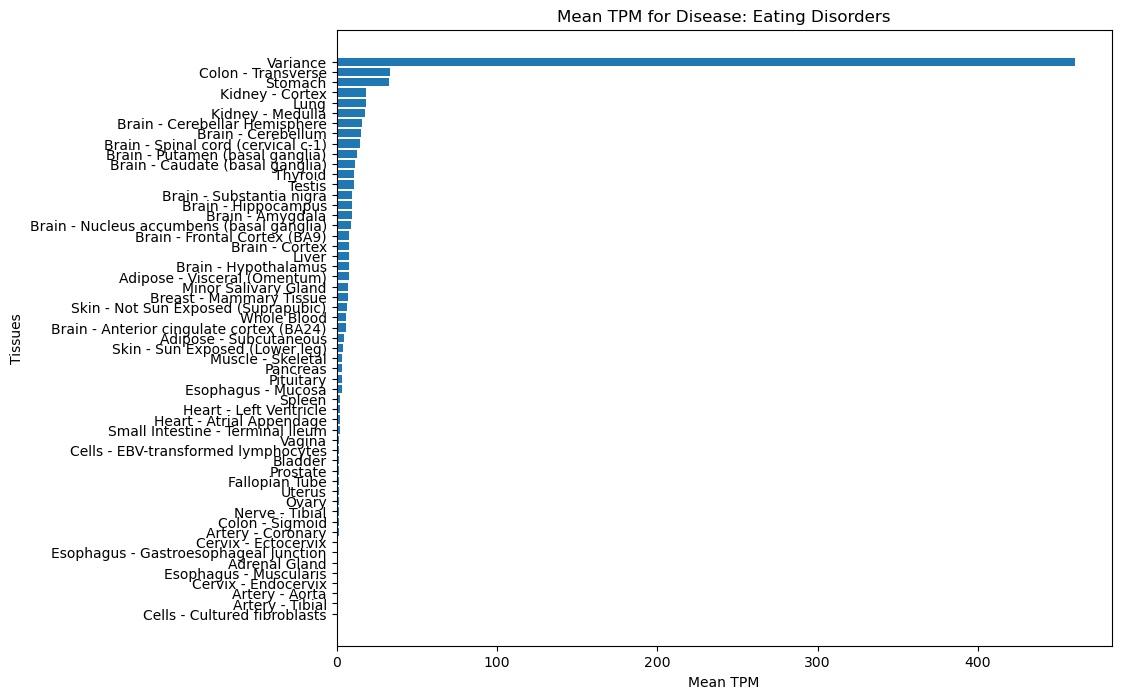

<Figure size 640x480 with 0 Axes>

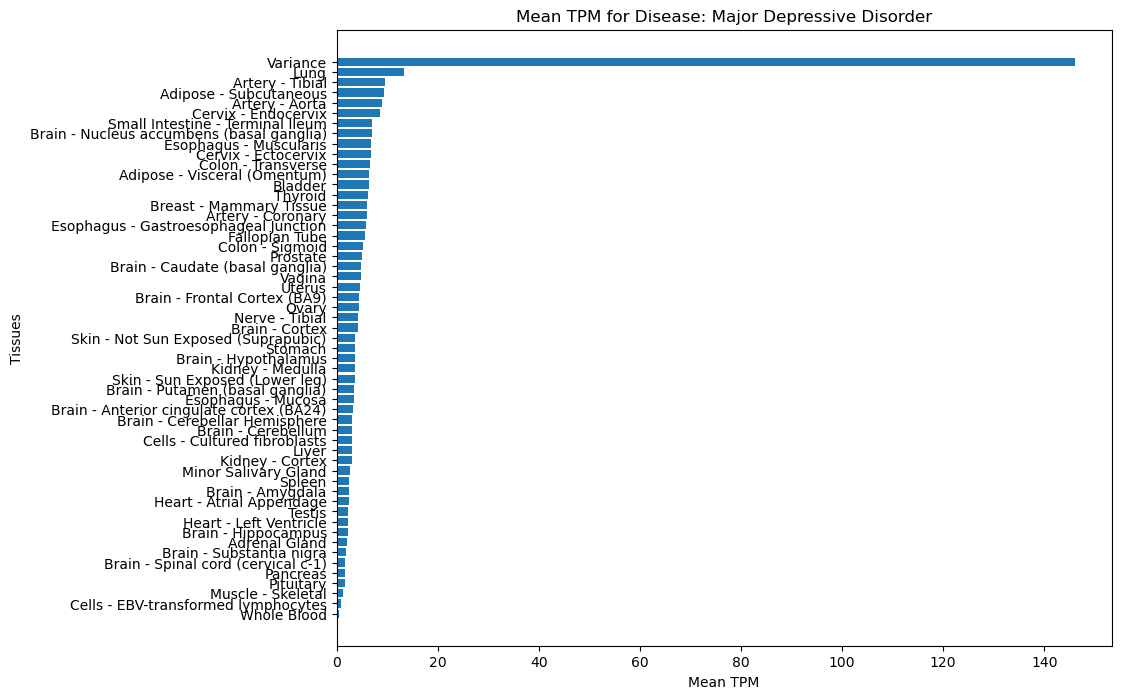

<Figure size 640x480 with 0 Axes>

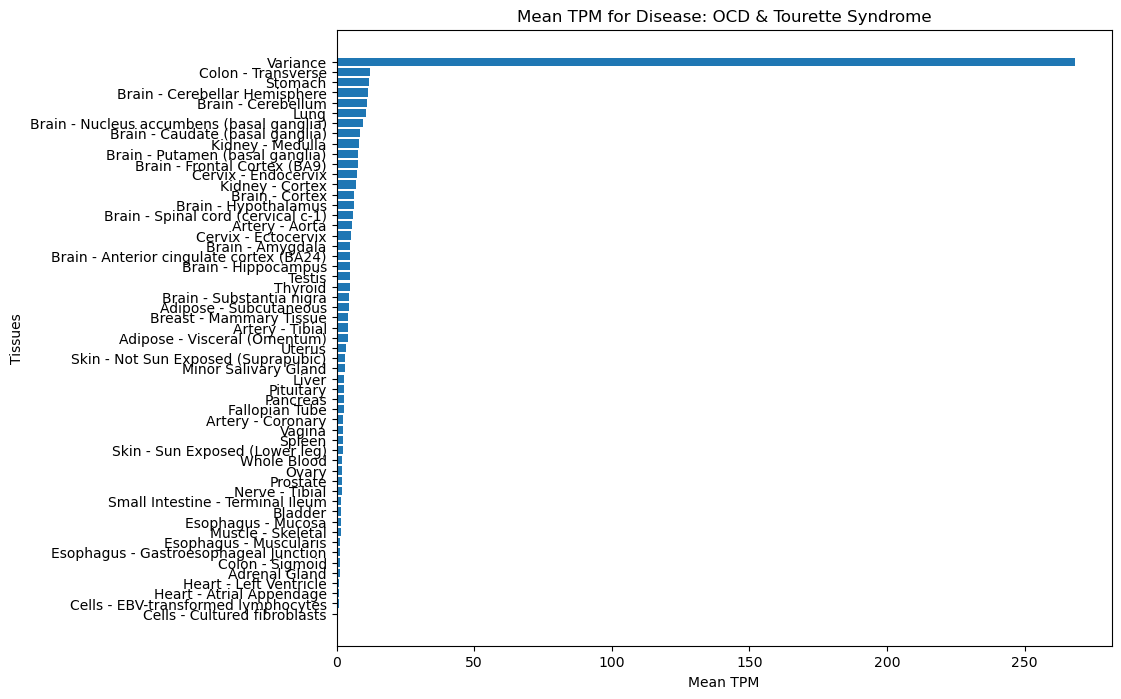

<Figure size 640x480 with 0 Axes>

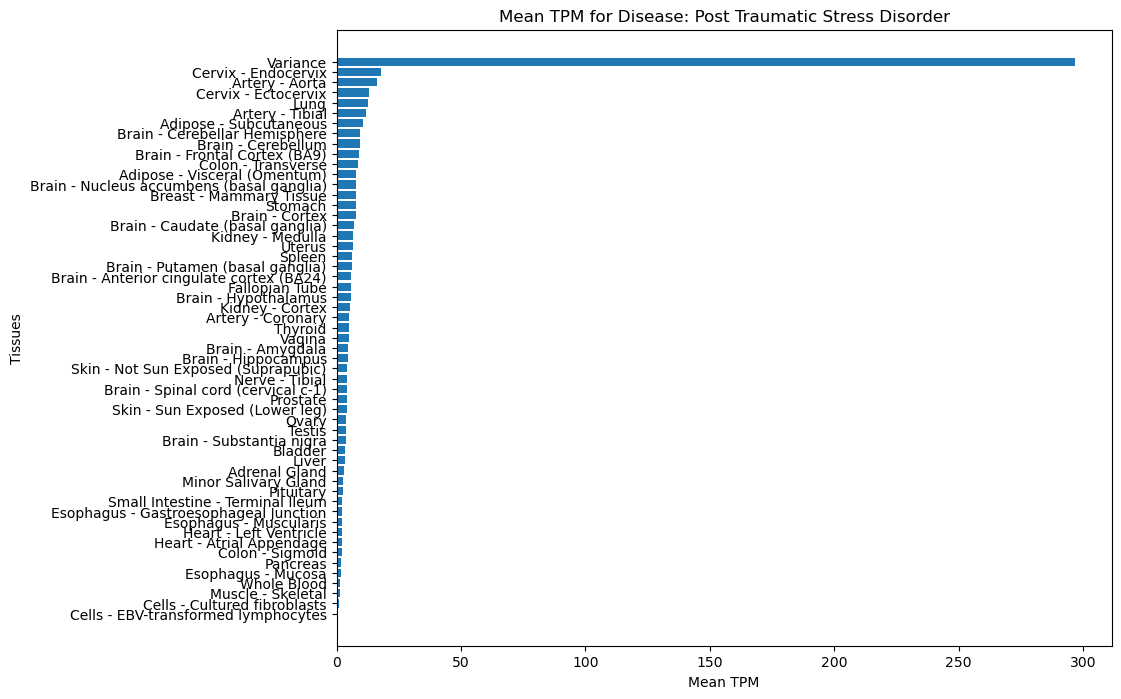

<Figure size 640x480 with 0 Axes>

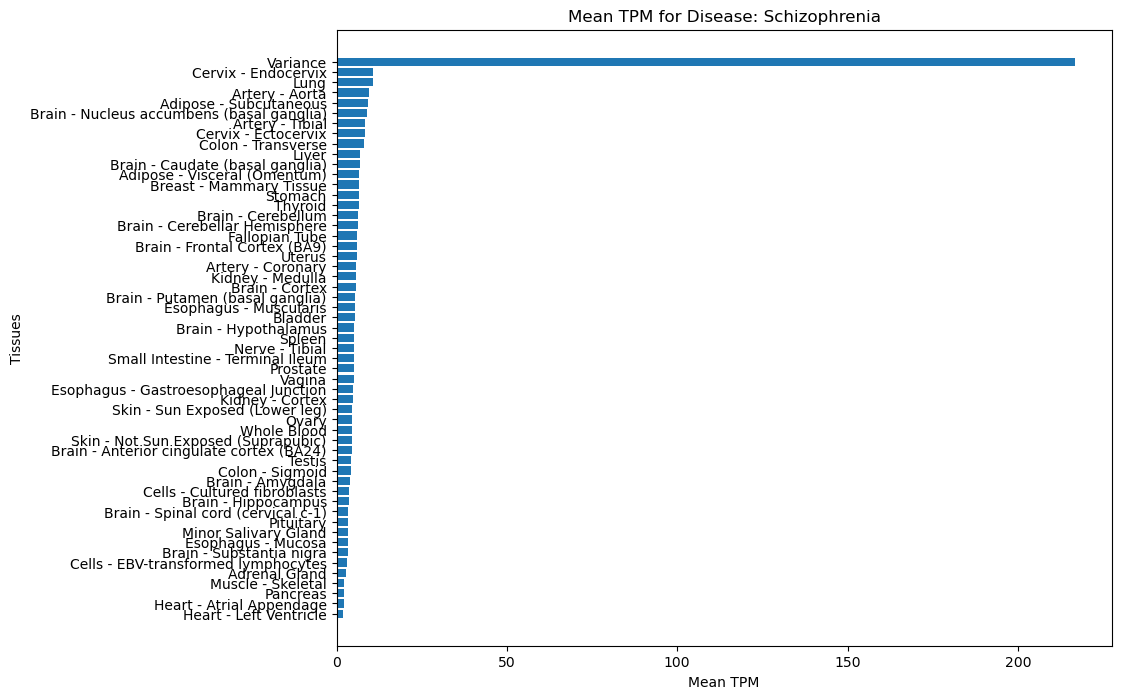

<Figure size 640x480 with 0 Axes>

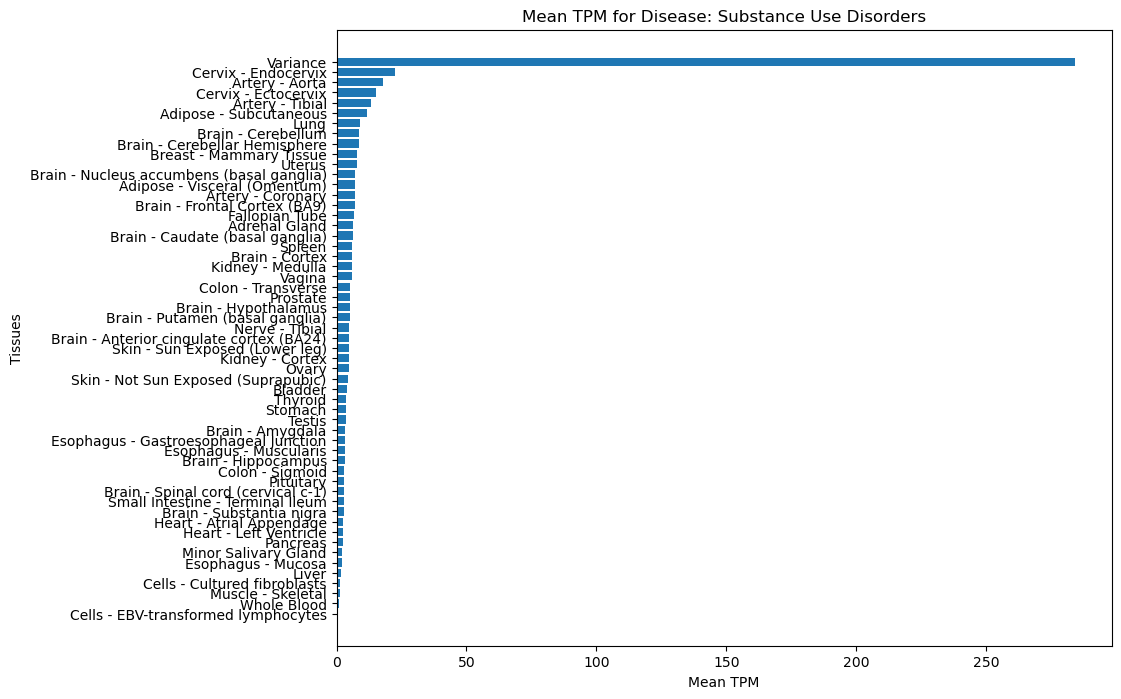

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

for index, row in tissue_means.iterrows():
    sorted_row = row.sort_values(ascending=False)
    
    plt.figure(figsize=(10, 8))
    plt.barh(sorted_row.index, sorted_row.values)
    
    plt.title(f"Mean TPM for Disease: {index}")
    
    plt.xlabel('Mean TPM')
    plt.ylabel('Tissues')

    plt.gca().invert_yaxis()
    
    plt.show()
    plt.savefig(f'../data/TPM_plot_Chembl/{index}_mean_tpm_plot.png')
